# Proyek Analisis Data: [Air Quality District in Beijing, China]
- **Nama:** [Shafida Afifah Firdausy]
- **Email:** [m279d4kx3233@bangkit.academy]
- **ID Dicoding:** [shafiidaaaa]

## Menentukan Pertanyaan Bisnis


#### **Pertanyaan 1: Bagaimana perkembangan kualitas udara per tahunnya? Adakah kenaikan atau penurunan?**
#### **Pertanyaan 2: Jika ada yang mengalami kenaikan, apa saja yang mengalami kenaikan?**
#### **Pertanyaan 3: Apakah ada polutan yang melebihi batas maksimal hingga tergolong berbahaya?**
#### **Pertanyaan 4: Jika ada polutan yang mencapai level berbahaya, dimana sajakah itu?**

## Import Semua Packages/Library yang Digunakan

In [35]:
!pip install streamlit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import streamlit as st
import datetime
import matplotlib.cm as cm


## Data Wrangling

### Gathering Data

In [36]:

aotizhongxin_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")

changping_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")

dingling_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")

dongsi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")

wanshouxigong_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

wanliu_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")

tiantan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")

shunyi_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")

nongzhanguan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")

huairou_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")

gucheng_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")

guanyuan_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")



List data dalam dictionary

In [37]:

dfs = {
    "aotizhongxin_df": aotizhongxin_df,
    "changping_df": changping_df,
    "dingling_df": dingling_df,
    "dongsi_df": dongsi_df,
    "guanyuan_df": guanyuan_df,
    "gucheng_df": gucheng_df,
    "huairou_df": huairou_df,
    "nongzhanguan_df": nongzhanguan_df,
    "shunyi_df": shunyi_df,
    "tiantan_df": tiantan_df,
    "wanliu_df": wanliu_df,
    "wanshouxigong_df": wanshouxigong_df,
}

area_list = [
    "aotizhongxin_df",
    "changping_df",
    "dingling_df",
    "dongsi_df",
    "guanyuan_df",
    "gucheng_df",
    "huairou_df",
    "nongzhanguan_df",
    "shunyi_df",
    "tiantan_df",
    "wanliu_df",
    "wanshouxigong_df",
]

### Assessing Data

Cek apakah data sudah berdistribusi normal

Jika data berdistribusi normal maka STD < 10 atau P-values<0.05

In [38]:

def checkNormality(data):
    for column_name, column_values in data.items():
        if pd.api.types.is_numeric_dtype(column_values):
            sdev = column_values.std()
            print(f"Standard Deviation of {column_name}: {sdev}")
            p_values = stats.shapiro(column_values)
            print(f"With p-values of {column_name}: {p_values}")


dengan fungsi di atas akan dilakukan cek normalitas terhadap data

In [39]:
for area, df in dfs.items():
    checkNormality(df)

Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.177213431819654
With p-values of year: ShapiroResult(statistic=0.8959008455276489, pvalue=0.0)
Standard Deviation of month: 3.4487523600476075
With p-values of month: ShapiroResult(statistic=0.9415743350982666, pvalue=0.0)
Standard Deviation of day: 8.800217529431375
With p-values of day: ShapiroResult(statistic=0.9540229439735413, pvalue=0.0)
Standard Deviation of hour: 6.92228526242799
With p-values of hour: ShapiroResult(statistic=0.9509114623069763, pvalue=0.0)
Standard Deviation of PM2.5: 82.13569353763613
With p-values of PM2.5: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PM10: 95.2230045626726
With p-values of PM10: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of SO2: 22.823016902754237
With p-values of SO2: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of NO2: 37.11619958015687
With

c:\Users\hp\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Standard Deviation of CO: 898.7382414443429
With p-values of CO: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of O3: 54.605746196353145
With p-values of O3: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of TEMP: 11.751103045292474
With p-values of TEMP: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of PRES: 10.022100923422308
With p-values of PRES: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of DEWP: 14.052541238106585
With p-values of DEWP: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of RAIN: 0.8490463297340689
With p-values of RAIN: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of WSPM: 1.1991430669781111
With p-values of WSPM: ShapiroResult(statistic=nan, pvalue=1.0)
Standard Deviation of No: 10122.24925597073
With p-values of No: ShapiroResult(statistic=0.9549350142478943, pvalue=0.0)
Standard Deviation of year: 1.177213431819654
With p-values of year: ShapiroResult(statistic=0.8959008455276489

Data No, Year, Month, Day, tidak akan dicek normalitasnya
Kita hanya akan melihat normalitas data polutan
Bisa dilihat satu persatu bahwa tidak ada data yang normal

Karena semua data belum berdistribusi normal, nilai yanga hilang dalam data akan diisi dengan median bukan mean, berikut ini fungsi yang akan digunakan

In [40]:

def fillMissingValues(data):
    filled_data = data.copy()
    for column_name, column_values in filled_data.items():
        if pd.api.types.is_numeric_dtype(column_values):
            column_values.fillna(value=column_values.median(), inplace=True)
            print(
                f"Missing values in {column_name} after: {column_values.isna().sum()}"
            )

    return filled_data


Sekarang akan kita cek apakah tipe kolom data sudah sesuai dengan datanya dan melihat apakah ada missing values

In [41]:
def checkBro(chooseData):
    chooseData.info()
    print(str(chooseData).upper())
    print("Missing values\t:\t", chooseData.isna().sum())
    # print(chooseData.hist())

for area, df in dfs.items():
    checkBro(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
          NO  YEAR  MONTH  DAY  HOUR  PM2.5  PM10   SO2   NO2     CO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
          NO  YEAR  MONTH  DAY  HOUR  PM2.5  PM10   SO2   NO2     CO

Tipe kolom data telah sesuai
Namun, terdapat beberapa missing values

### Cleaning Data

Sekarang data yang hilang akan kita isi dengan median, dan kita simpan dalam variabel baru agar tidak overwrite

In [42]:

dfs_after = {}

for area, df in dfs.items():
    df_after = fillMissingValues(df)
    dfs_after[area + '_after'] = df_after


Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0
Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM

Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0
Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2 after: 0
Missing values in CO after: 0
Missing values in O3 after: 0
Missing values in TEMP after: 0
Missing values in PRES after: 0
Missing values in DEWP after: 0
Missing values in RAIN after: 0
Missing values in WSPM after: 0
Missing values in No after: 0
Missing values in year after: 0
Missing values in month after: 0
Missing values in day after: 0
Missing values in hour after: 0
Missing values in PM2.5 after: 0
Missing values in PM10 after: 0
Missing values in SO2 after: 0
Missing values in NO2

Missing values terlah berhasil diisi

Sekarang kita cek apakah ada data yang terduplikasi

In [43]:

for area, df_after in dfs_after.items():
    print(f"{area} Duplicates: {df_after.duplicated().sum()}")

print("THERE ARE NO DUPLICATES YEESSS")


aotizhongxin_df_after Duplicates: 0
changping_df_after Duplicates: 0


dingling_df_after Duplicates: 0
dongsi_df_after Duplicates: 0
guanyuan_df_after Duplicates: 0
gucheng_df_after Duplicates: 0
huairou_df_after Duplicates: 0
nongzhanguan_df_after Duplicates: 0
shunyi_df_after Duplicates: 0
tiantan_df_after Duplicates: 0
wanliu_df_after Duplicates: 0
wanshouxigong_df_after Duplicates: 0
THERE ARE NO DUPLICATES YEESSS


Ternyata data sudah tidak ada yang terduplikasi

Selanjutnya akan di cek apakah data mengandung outliers, jika iya maka akan dilakukan imputasi dengan median

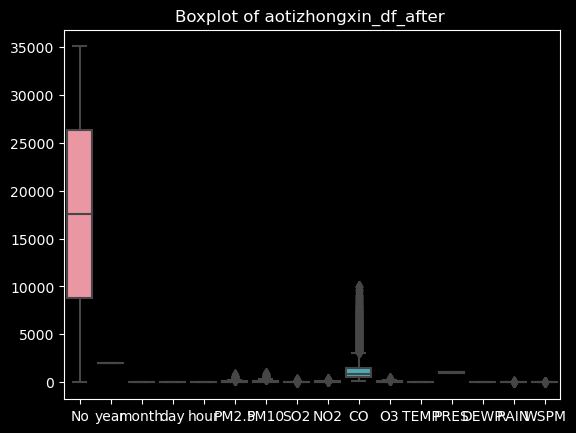

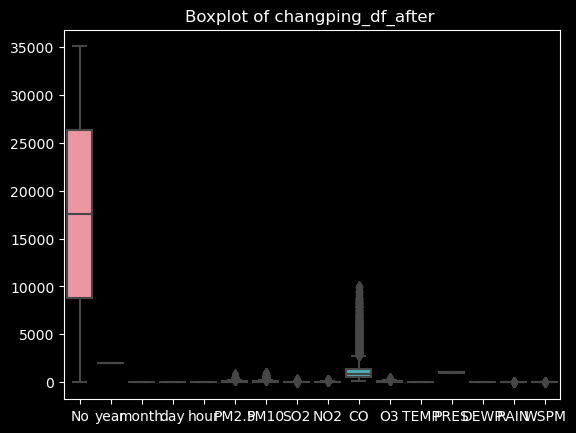

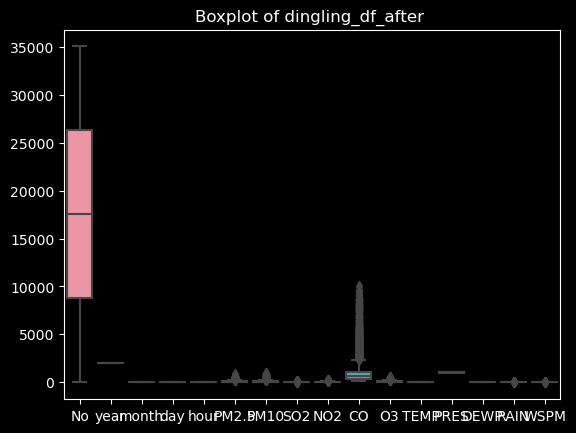

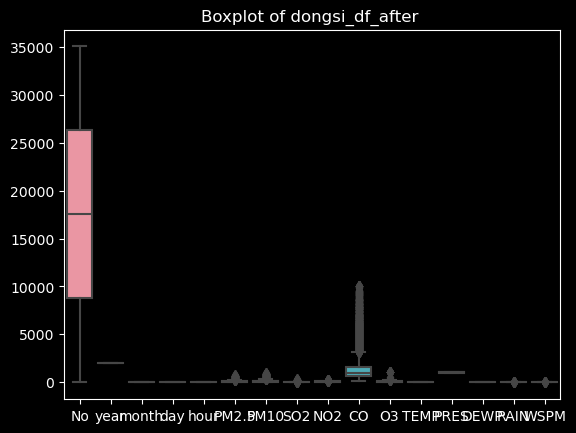

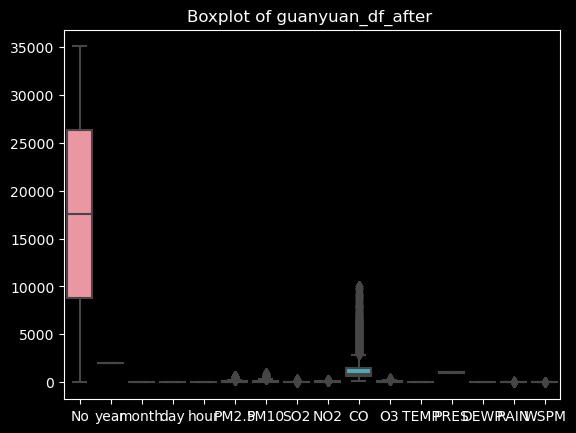

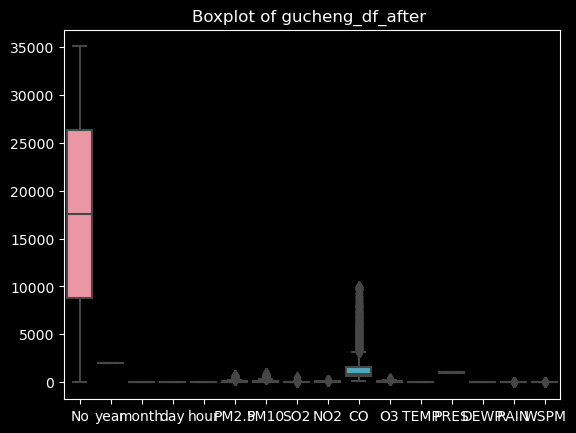

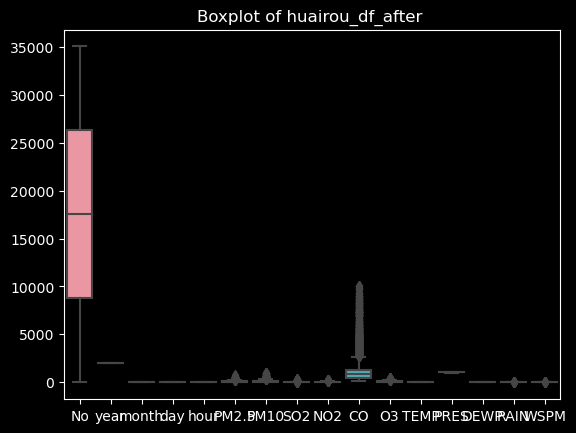

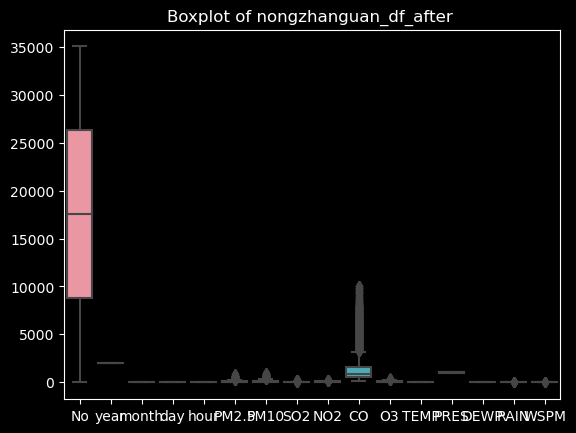

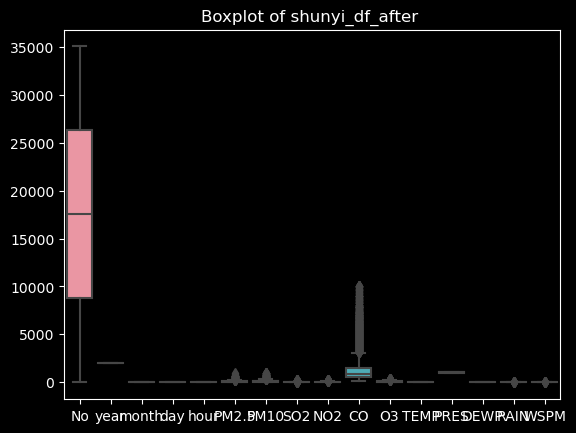

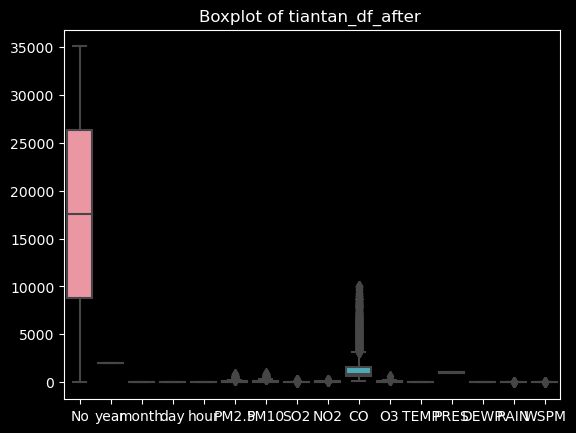

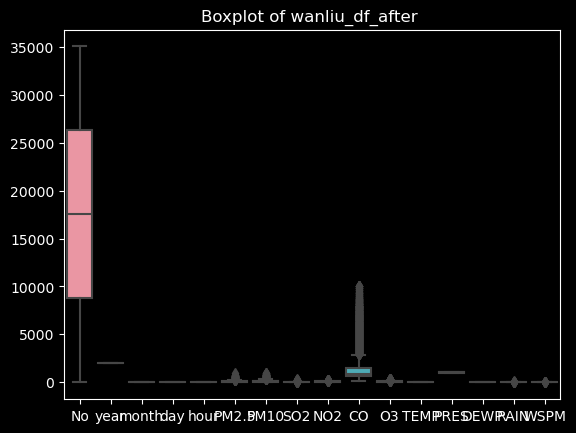

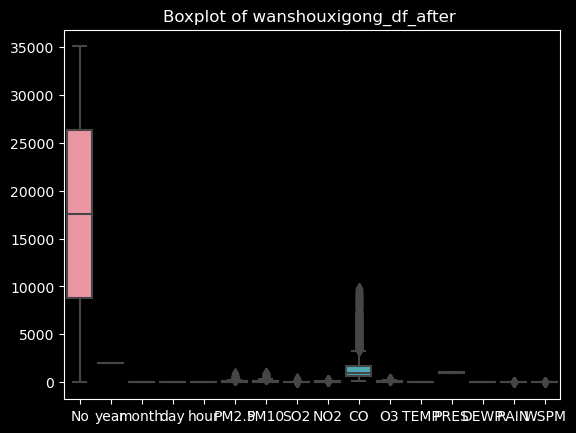

In [44]:
for area, df in dfs_after.items():
    plt.title("Boxplot of {} ".format(area))
    sns.boxplot(df)
    plt.show()

Masih terdapat beberapa outliers, maka akan kita cari dengan IQR dan akan diganti atau diimputasi dengan median

In [45]:

def imputationOutliers(chooseData):
    for column_name, column_values in chooseData.items():
        if pd.api.types.is_numeric_dtype(column_values):
            q1 = np.percentile(column_values, 25)
            q3 = np.percentile(column_values, 75)
            iqr = q3 - q1
            upperBound = q3 + 3 * iqr
            lowerBound = q1 - 3 * iqr

            if iqr > 0:
                outliers = column_values[
                    (column_values < lowerBound) | (column_values > upperBound)
                ]
                print(
                    column_name,
                    "IQR   \t:",
                    iqr,
                    "                  \t=====>>>>>",
                    column_name,
                    "outliers : ",
                    outliers.count(),
                )

                chooseData[column_name] = np.where(
                    column_values < lowerBound, lowerBound, column_values
                )
                chooseData[column_name] = np.where(
                    column_values > upperBound, upperBound, column_values
                )

            else:
                pass
    print("\n")



In [46]:
dfs_outlier_imputed = {}

for area, df in dfs_after.items():
    print(area)
    imputationOutliers(df)
    dfs_outlier_imputed[area] = df


aotizhongxin_df_after
No IQR   	: 17531.5                   	=====>>>>> No outliers :  0
year IQR   	: 2.0                   	=====>>>>> year outliers :  0
month IQR   	: 6.0                   	=====>>>>> month outliers :  0
day IQR   	: 15.0                   	=====>>>>> day outliers :  0
hour IQR   	: 11.5                   	=====>>>>> hour outliers :  0
PM2.5 IQR   	: 89.0                   	=====>>>>> PM2.5 outliers :  330
PM10 IQR   	: 114.0                   	=====>>>>> PM10 outliers :  201
SO2 IQR   	: 18.0                   	=====>>>>> SO2 outliers :  1138
NO2 IQR   	: 50.0                   	=====>>>>> NO2 outliers :  19
CO IQR   	: 1000.0                   	=====>>>>> CO outliers :  969
O3 IQR   	: 71.0                   	=====>>>>> O3 outliers :  59
TEMP IQR   	: 20.2                   	=====>>>>> TEMP outliers :  0
PRES IQR   	: 16.800000000000068                   	=====>>>>> PRES outliers :  0
DEWP IQR   	: 23.7                   	=====>>>>> DEWP outliers :  0
WSPM IQR   

PRES IQR   	: 16.800000000000068                   	=====>>>>> PRES outliers :  0
DEWP IQR   	: 23.7                   	=====>>>>> DEWP outliers :  0
WSPM IQR   	: 1.3000000000000003                   	=====>>>>> WSPM outliers :  190


gucheng_df_after
No IQR   	: 17531.5                   	=====>>>>> No outliers :  0
year IQR   	: 2.0                   	=====>>>>> year outliers :  0
month IQR   	: 6.0                   	=====>>>>> month outliers :  0
day IQR   	: 15.0                   	=====>>>>> day outliers :  0
hour IQR   	: 11.5                   	=====>>>>> hour outliers :  0
PM2.5 IQR   	: 89.0                   	=====>>>>> PM2.5 outliers :  341
PM10 IQR   	: 120.0                   	=====>>>>> PM10 outliers :  181
SO2 IQR   	: 17.0                   	=====>>>>> SO2 outliers :  990
NO2 IQR   	: 52.0                   	=====>>>>> NO2 outliers :  8
CO IQR   	: 1000.0                   	=====>>>>> CO outliers :  846
O3 IQR   	: 72.0                   	=====>>>>> O3 outliers :  52


Untuk mengecek apakah masih terdapat outliers, maka kita run fungsi imputationOutliers denagn data dfs_outlier_imputed

In [47]:
for area, df in dfs_outlier_imputed.items():
    print(area)
    imputationOutliers(df)

aotizhongxin_df_after
No IQR   	: 17531.5                   	=====>>>>> No outliers :  0
year IQR   	: 2.0                   	=====>>>>> year outliers :  0
month IQR   	: 6.0                   	=====>>>>> month outliers :  0
day IQR   	: 15.0                   	=====>>>>> day outliers :  0
hour IQR   	: 11.5                   	=====>>>>> hour outliers :  0
PM2.5 IQR   	: 89.0                   	=====>>>>> PM2.5 outliers :  0
PM10 IQR   	: 114.0                   	=====>>>>> PM10 outliers :  0
SO2 IQR   	: 18.0                   	=====>>>>> SO2 outliers :  0
NO2 IQR   	: 50.0                   	=====>>>>> NO2 outliers :  0
CO IQR   	: 1000.0                   	=====>>>>> CO outliers :  0
O3 IQR   	: 71.0                   	=====>>>>> O3 outliers :  0
TEMP IQR   	: 20.2                   	=====>>>>> TEMP outliers :  0
PRES IQR   	: 16.800000000000068                   	=====>>>>> PRES outliers :  0
DEWP IQR   	: 23.7                   	=====>>>>> DEWP outliers :  0
WSPM IQR   	: 1.300000

TEMP IQR   	: 20.4                   	=====>>>>> TEMP outliers :  0
PRES IQR   	: 16.899999999999977                   	=====>>>>> PRES outliers :  0
DEWP IQR   	: 23.8                   	=====>>>>> DEWP outliers :  0
WSPM IQR   	: 1.4                   	=====>>>>> WSPM outliers :  0


guanyuan_df_after
No IQR   	: 17531.5                   	=====>>>>> No outliers :  0
year IQR   	: 2.0                   	=====>>>>> year outliers :  0
month IQR   	: 6.0                   	=====>>>>> month outliers :  0
day IQR   	: 15.0                   	=====>>>>> day outliers :  0
hour IQR   	: 11.5                   	=====>>>>> hour outliers :  0
PM2.5 IQR   	: 89.0                   	=====>>>>> PM2.5 outliers :  0
PM10 IQR   	: 107.0                   	=====>>>>> PM10 outliers :  0
SO2 IQR   	: 18.0                   	=====>>>>> SO2 outliers :  0
NO2 IQR   	: 47.0                   	=====>>>>> NO2 outliers :  0
CO IQR   	: 900.0                   	=====>>>>> CO outliers :  0
O3 IQR   	: 71.0      

Setelah di cek ternyata outliers sudah dapat teratasi

Sekarang kita akan menangani data missing values khususnya pada data yang tidak bertipe integer
Berikut ini akan dilakukan pengisian missing values pada data yang hilang di kolom wd dan akan diimputasi dengan modus

In [48]:

dfs_cleaned = {}
for area, df in dfs_outlier_imputed.items():
    modeWindDirection = df["wd"].mode()[0]
    df["wd"].fillna(modeWindDirection, inplace=True)
    print(area, " Missing Values \t: ", df["wd"].isna().sum())
    dfs_cleaned[area] = df


aotizhongxin_df_after  Missing Values 	:  0
changping_df_after  Missing Values 	:  0
dingling_df_after  Missing Values 	:  0
dongsi_df_after  Missing Values 	:  0
guanyuan_df_after  Missing Values 	:  0
gucheng_df_after  Missing Values 	:  0
huairou_df_after  Missing Values 	:  0
nongzhanguan_df_after  Missing Values 	:  0
shunyi_df_after  Missing Values 	:  0
tiantan_df_after  Missing Values 	:  0
wanliu_df_after  Missing Values 	:  0
wanshouxigong_df_after  Missing Values 	:  0


Setelah di cek kembali missing valuesnya sudah dapat diatasi

## Exploratory Data Analysis (EDA)

Sekarang kita akan melihat berbegai tipe kolom data untuk memudahkan operasi antar kolom

In [49]:
for area, df in dfs_cleaned.items():
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  float64
 1   year     35064 non-null  float64
 2   month    35064 non-null  float64
 3   day      35064 non-null  float64
 4   hour     35064 non-null  float64
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(16), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Da

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  float64
 1   year     35064 non-null  float64
 2   month    35064 non-null  float64
 3   day      35064 non-null  float64
 4   hour     35064 non-null  float64
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(16), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Da

In [50]:
for area, df in dfs_cleaned.items():
    print(df.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      81.312095    109.014579     16.210035     59.109168   1201.860027   
std       77.347172     91.287404     18.664410    

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      64.759323     82.592956     10.931022     27.115277    862.546344   
std       68.449232     74.966318     12.644308    

Sekarang satukan semua data untuk memudahkan perhitungan untuk seluruh distrik

In [51]:
all_data = pd.concat(dfs_cleaned.values())

Setelah itu akan dibuat fungsi untuk mengitung AQI untuk mengetahui kualitas udara dan mengelompokkannya dalam kategori tertentu

<br/>Standar/Batas dari AQI itu sendiri berada dalam aqiTable

Rumus Perhitungan AQI
adalah
                   

                   I = (Ia - Ib)(Xx-Xb)/(Xa-Xb) + Ib

                   I = ISPU terhitung

                   Ia = ISPU batas atas

                   Ib = ISPU batas bawah

                   Xa = Konsentrasi ambien batas atas (µg/m3)

                   Xb = Konsentrasi ambien batas bawah (µg/m3)

                   Xx = Konsentrasi ambien nyata hasil pengukuran

In [52]:
def calculateAqi(pollutant, averageDaily):
    global aqiTable
    aqiTable = {
        'PM2.5': {
            50: (0, 12),
            100: (12.1, 35.4),
            150: (35.5, 55.4),
            200: (55.5, 150.4),
            300: (150.5, 250.4),
            400: (250.5, 350.4),
            500: (350.5, 500.4)
        },
        'PM10': {
            50: (0, 50),
            100: (51, 100),
            250: (101, 250),
            350: (251, 350),
            420: (351, 420),
            500: (421, 500)
        },
        'SO2': {
            50: (0, 35),
            100: (36, 75),
            150: (76, 185),
            200: (186, 304),
            300: (305, 604),
            400: (605, 804),
            500: (805, 1004)
        },
        'CO': {
            50: (0, 4.4),
            100: (4.5, 9.4),
            150: (9.5, 12.4),
            200: (12.5, 15.4),
            300: (15.5, 30.4),
            400: (30.5, 40.4),
            500: (40.5, 50.4)
        },
        'O3': {
            50: (0, 54),
            100: (55, 70),
            150: (71, 85),
            200: (86, 105),
            300: (106, 200),
            400: (201, 504),
            500: (505, 604)
        },
        'NO2': {
            50: (0, 53),
            100: (54, 100),
            150: (101, 360),
            200: (361, 649),
            300: (650, 1249),
            400: (1250, 1649),
            500: (1650, 2049)
        },
    }

    if pollutant in aqiTable:
        for aqiValue, (low, high) in aqiTable[pollutant].items():
            if low <= averageDaily <= high:
                result = ((averageDaily - low) / (high - low)) * (aqiValue - 0) + 0
                return result

        maxAqi = max(aqiTable[pollutant].keys())
        if averageDaily > high:
            scaled_result = maxAqi + ((averageDaily - high) / (averageDaily - high)) * (500 - maxAqi)
            return scaled_result
        else:
            return 500
    else:
        print("Input pollutant between PM2.5, PM10, CO, SO, NO2, O3")
        return None

Lalu setelah dihitung aqi akan dimasukkan dalam kategori sesuai di bawah ini

In [53]:

def aqiCategory(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 199:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 299:
        return "Unhealthy"
    elif aqi <= 399:
        return "Very Unhealthy"
    else:
        return "Hazardous"

Sekarang kita buat pivot table dengan mengelompokkannya dengan tahun dan nilainya diisi dengan rata-rata

In [54]:
group_byyear = all_data.groupby(by="year").agg({
    "PM2.5": "mean",
    "PM10": "mean",
    "SO2":"mean",
    "NO2":"mean",
    "CO":"mean",
    "O3":"mean",
})

Sekarang kita buat pivot table dengan mengelompokkannya dengan tahun dan nilainya diisi dengan rata-rata AQI per tahun

In [55]:
group_byaqi = all_data.groupby(by="year").agg({
    "PM2.5": lambda x: calculateAqi("PM2.5", x.mean()),
    "PM10": lambda x: calculateAqi("PM10",x.mean()),
    "SO2": lambda x: calculateAqi("SO2",x.mean()),
    "NO2": lambda x: calculateAqi("NO2",x.mean()),
    "CO": lambda x: calculateAqi("CO",x.mean()),
    "O3": lambda x: calculateAqi("O3",x.mean())
})

Selanjutnya kita akan buat perhitungan SUM DAILY, AVERAGE DAILY, SUM MONTHLY, AVERAGE MONTHLY, SUM YEARLY, AVERAGE YEARLY untuk memudahkan 

In [56]:

def calculatePollutantDaily(chooseData,pollutant,day,month,year):
    global sumDaily
    global averageDaily

    #CHECK DATA TYPE
    if type(pollutant) != str:
        print("Input string in pollutant")

    if type(day) != int:
        print("Input int in day")

    if type(month) != int:
        print("Input int in day month")

    if type(year) != int:
        print("Input int in day year")
    elif len(str(year)) != 4:
        print("Input 4 digit in year")


    sumDaily = chooseData[pollutant][(chooseData["year"] == year) & (chooseData["month"] == month) & (chooseData["day"] == day)].sum()
    averageDaily = chooseData[pollutant][(chooseData["year"] == year) & (chooseData["month"] == month) & (chooseData["day"] == day)].mean()
    aqi = calculateAqi(pollutant, averageDaily)

    return sumDaily, averageDaily, aqi, aqiCategory(aqi)


def calculatePollutantMonthly(chooseData, pollutant, month, year):
    global averageMonthly
    global sumMonthly
    # CHECK DATA TYPE
    if type(pollutant) != str:
        print("Input string in pollutant")

    if type(month) != int:
        print("Input int in day month")

    if type(year) != int:
        print("Input int in day year")
    elif len(str(year)) != 4:
        print("Input 4 digit in year")

    sumMonthly = chooseData[pollutant][(chooseData["year"] == year) & (chooseData["month"] == month)].sum()
    averageMonthly = chooseData[pollutant][(chooseData["year"] == year) & (chooseData["month"] == month)].mean()
    aqi = calculateAqi(pollutant, averageMonthly)

    return sumMonthly, averageMonthly,aqi, aqiCategory(aqi)


calculatePollutantMonthly(aotizhongxin_df, "PM2.5", 2, 2014)


def calculatePollutantYearly(chooseData, pollutant, year):
    global sumYearly
    global averageYearly
    if type(pollutant) != str:
        print("Input string in pollutant")

    if type(year) != int:
        print("Input int in day year")
    elif len(str(year)) != 4:
        print("Input 4 digit in year")

    sumYearly = chooseData[pollutant][(chooseData["year"] == year)].sum()
    averageYearly = chooseData[pollutant][(chooseData["year"] == year)].mean()
    aqi = calculateAqi(pollutant, averageYearly)

    return sumYearly, averageYearly,aqi, aqiCategory(aqi)


## Visualization & Explanatory Analysis

Sekarang akan dibuat dashboard

---


Akan dimulai dari sidebar, di dalam sidebar akan digunakan perhitungan AQI untuk daily dan menampilkan apakah kualitas udara baik atau buruk berdasarkan polutan yang dipilih.

In [57]:

st.markdown("<h1 style='text-align: center;'>Air Quality District of China</h1>", unsafe_allow_html=True)
st.write("<h4 style='text-align: center;'>Preliminary Risk Screen Assessments (PRSAs)</h4>", unsafe_allow_html=True)
st.write("<h4 style='text-align: center;'>2013 - 2017</h4><br /><br /><br /><hr />", unsafe_allow_html=True)

plt.style.use('dark_background')
with st.sidebar:
    st.subheader("AQI in daily")
    st.text("Choose the Data")


    SelectCity = st.selectbox("Select City",
        [
            "aotizhongxin_df_after",
            "changping_df_after",
            "dingling_df_after",
            "dongsi_df_after",
            "guanyuan_df_after",
            "gucheng_df_after",
            "huairou_df_after",
            "nongzhanguan_df_after",
            "shunyi_df_after",
            "tiantan_df_after",
            "wanliu_df_after",
            "wanshouxigong_df_after",
        ]
    )



    data = st.selectbox(
        "Select Data",
        [
            "PM2.5",
            "PM10",
            "SO2",
            "NO2",
            "CO",
            "O3",
            "TEMP",
            "PRES",
            "DEWP",
            "RAIN",
            "wd",
            "WSPM",
        ]
    )
    selectDate = st.date_input(
        label="Date",
        min_value=datetime.date(2013, 3, 1),
        max_value=datetime.date(2017, 2, 28),
        value=datetime.date(2013, 3, 1),
    )


    st.write("Data ", data, "in ", selectDate, " at ", SelectCity," : ")

    selected_df = dfs_cleaned[SelectCity]

    day = selectDate.day
    month = selectDate.month
    year = selectDate.year


    if selected_df is not None:
        st.write(selected_df[data][(selected_df["year"] == year) & (selected_df["month"] == month) & (selected_df["day"] == day)].describe(include="all"))
        _, _, _, aqi_category = calculatePollutantDaily(selected_df, data, day, month, year)
        st.write("AQI Category :", aqi_category)
    else:
        st.write("Invalid selection. Please choose a valid city.")



Disini sidebar telah menjawab sesuai dengan kualitas AQI per harinya. Tanggal bisa dipilih menyesuaikan

#### **Pertanyaan 1: Bagaimana perkembangan kualitas udara per tahunnya? Adakah kenaikan atau penurunan?**

#### **Pertanyaan 2: Jika ada yang mengalami kenaikan, apa saja yang mengalami kenaikan?**

Maka sekarang akan kita lihat visualisasi berdasarkan tahunnya

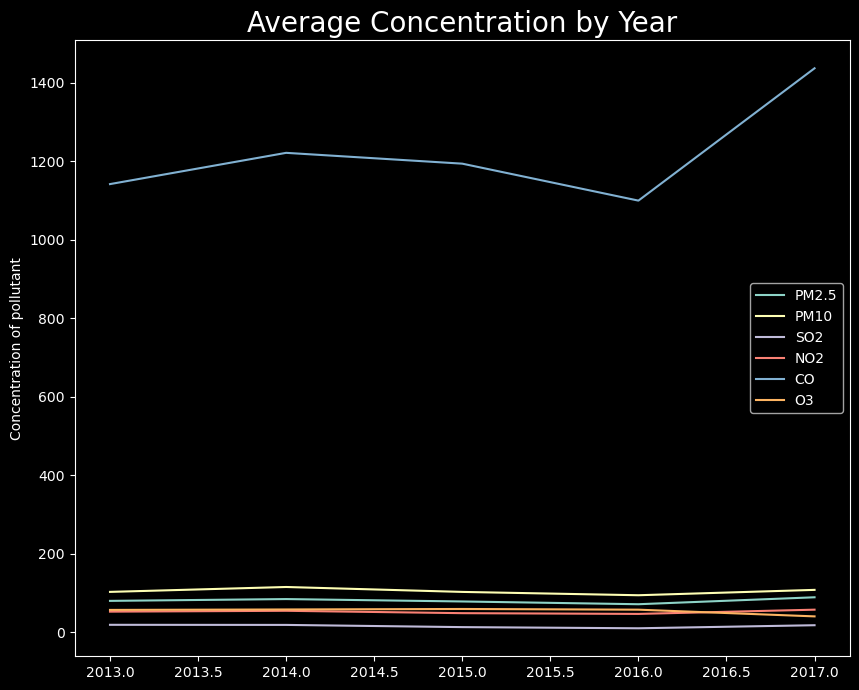

In [58]:



col1, col2, col3, = st.columns(3)

st.subheader("Overall Average per Pollutant")
with col1:
    st.write("Average Pollutan PM2.5 in Beijing")
    st.code(group_byyear["PM2.5"].mean())
    st.write("Average Pollutan NO2 in Beijing")
    st.code(group_byyear["NO2"].mean())
with col2:
    st.write("Average Pollutan PM10 in Beijing")
    st.code(group_byyear["PM10"].mean())
    st.write("Average Pollutan CO in Beijing")
    st.code(group_byyear["CO"].mean())
with col3:
    st.write("Average Pollutan SO2 in Beijing")
    st.code(group_byyear["SO2"].mean())
    st.write("Average Pollutan SO2 in Beijing")
    st.code(group_byyear["SO2"].mean())

fig, ax = plt.subplots(figsize=(10,8))
x_axis = group_byyear.index
y_axis = group_byyear.values
keysyear = group_byyear.keys()
ax.set_title("Average Concentration by Year", fontsize=20)
ax.plot(x_axis,y_axis)
plt.legend(keysyear)
ax.set_ylabel("Concentration of pollutant")
st.pyplot(fig)
plt.show()


Lalu sekarang akan dibandingkan AQI per tahunnya 

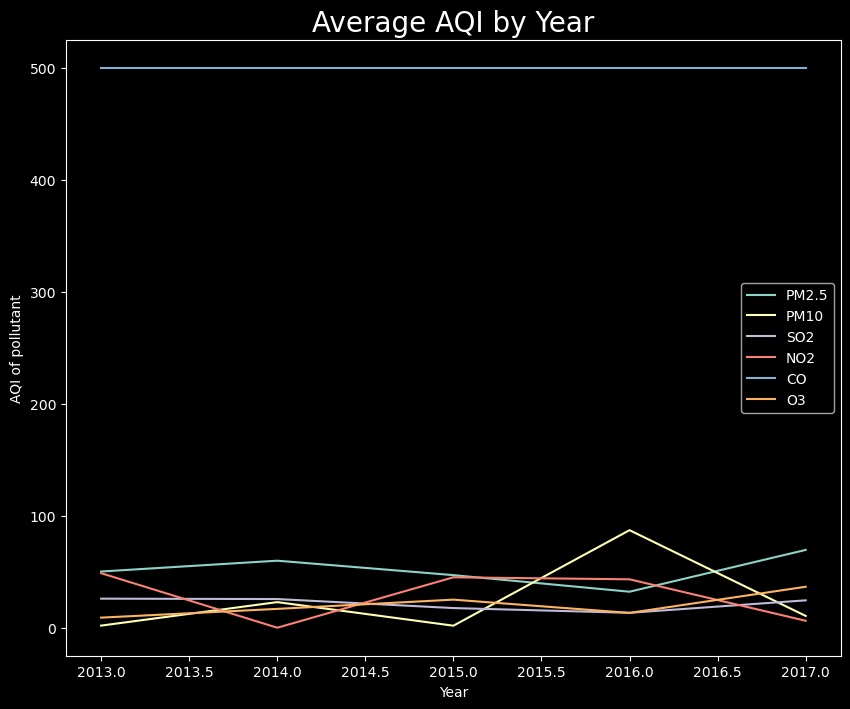

In [59]:
col1, col2, col3, = st.columns(3)

st.subheader("Overall Average per Pollutant")
with col1:
    st.write("AQI PM2.5 in Beijing")
    st.code(group_byaqi["PM2.5"].mean())
    st.write("AQI NO2 in Beijing")
    st.code(group_byaqi["NO2"].mean())
with col2:
    st.write("AQI PM10 in Beijing")
    st.code(group_byaqi["PM10"].mean())
    st.write("AQI CO in Beijing")
    st.code(group_byaqi["CO"].mean())
with col3:
    st.write("AQI SO2 in Beijing")
    st.code(group_byaqi["SO2"].mean())
    st.write("AQI SO2 in Beijing")
    st.code(group_byaqi["SO2"].mean())


fig, ax = plt.subplots(figsize=(10,8))
x_axis = group_byaqi.index
y_axis = group_byaqi.values
keysaqi = group_byaqi.keys()
ax.set_title("Average AQI by Year", fontsize=20)
ax.plot(x_axis,y_axis)
ax.legend(keysaqi)
ax.set_xlabel("Year")
ax.set_ylabel("AQI of pollutant")
st.pyplot(fig)
plt.show()



#### **Pertanyaan 3: Apakah ada polutan yang melebihi batas maksimal hingga tergolong berbahaya?**
#### **Pertanyaan 4: Jika ada polutan yang mencapai level berbahaya, dimana sajakah itu?**

Lalu sekarang akan ditampilkan perbandingan AQI pada setiap polutan antar kota dan itu akan terlihat dari visualisasi warnanya:



```
GOOD                            : HIJAU
MODERATE                        : KUNING
UNHEALTHTY FOR SENSITIVE GROUP  : ORANGE
UNHEALTHTY                      : RED
VERY UNHEALTHTY                 : PURPLE
HAZARDOUS                       : GREY
```

Disini warna digunakan sesuai dengan kebutuhan desain yaitu untuk memudahkan pengelompokkan data

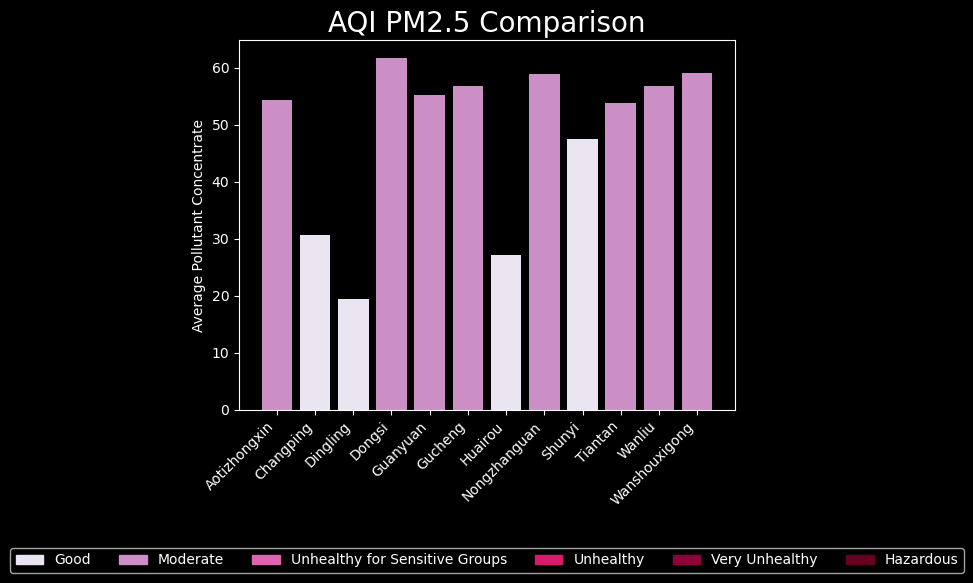

In [60]:
st.subheader("AQI categories in each cities by pollutant")
pollutant = st.selectbox(
    "Select Pollutant",[
        "PM2.5",
        "PM10",
        "SO2",
        "NO2",
        "CO",
        "O3",

    ])
plt.style.use('dark_background')
cityLabel = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']





cleaned_data_key = [key for key in dfs_cleaned.keys() if 'after' in key][0]

avg = {}
for area, df in dfs_cleaned.items():
    average = df[pollutant].mean()
    aqi = calculateAqi(pollutant,average)
    if aqi is not None:
        avg[area] = {
            'Average': average,
            'Aqi':aqi,
            'Category':aqiCategory(aqi)
        }
    else:
        st.write("Error calculation AQI for", pollutant,' in ',area)

avg_df = pd.DataFrame.from_dict(avg, orient='index')

cmap = plt.get_cmap('PuRd')

colors = {
    'Good': cmap(0.1),
    'Moderate': cmap(0.39),
    'Unhealthy for Sensitive Groups': cmap(0.5),
    'Unhealthy': cmap(0.7),
    'Very Unhealthy': cmap(0.9),
    'Hazardous': cmap(1.0)
}

bar_colors = [colors[category] for category in avg_df['Category']]

fig, ax = plt.subplots()
ax.bar(x=cityLabel, height=avg_df['Aqi'], color=bar_colors)
ax.set_title("AQI {} Comparison".format(pollutant), loc="center", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Average Pollutant Concentrate")
plt.xticks(rotation=45)
plt.xticks(range(len(cityLabel)), cityLabel, ha='right')
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[category]) for category in colors.keys()]
legend_labels = colors.keys()
ax.legend(legend_handles,legend_labels,loc='lower center', bbox_to_anchor=(0.5,-0.46),ncol=len(colors))
st.pyplot(fig)
plt.show()

Setelah melihat rata-rata konsentrasi polutan secara keseluruhan, sekarang akan dilihat rata-rata konsentrasi pada setiap kota.

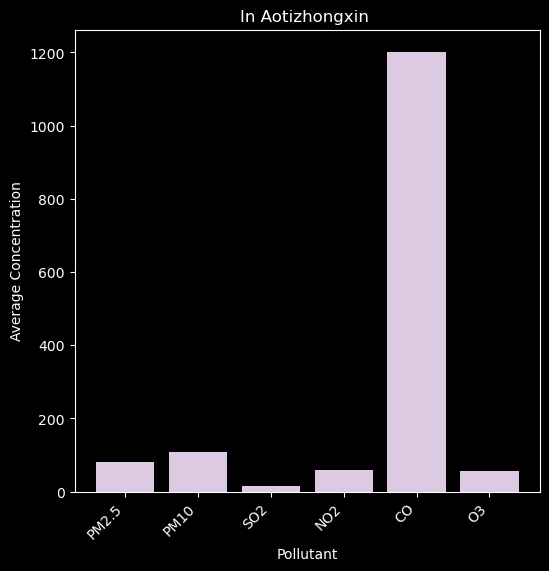

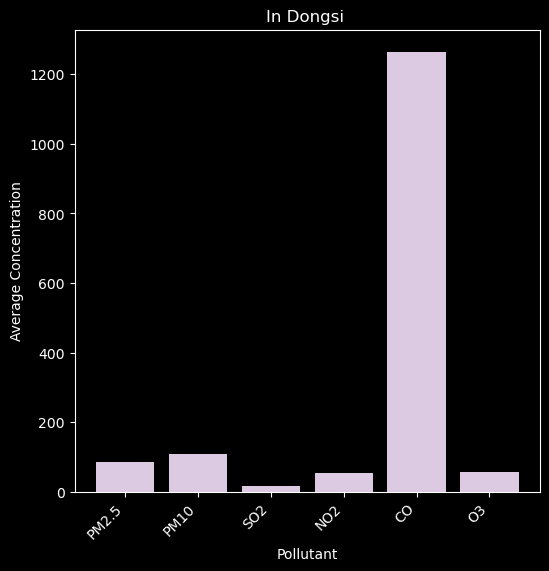

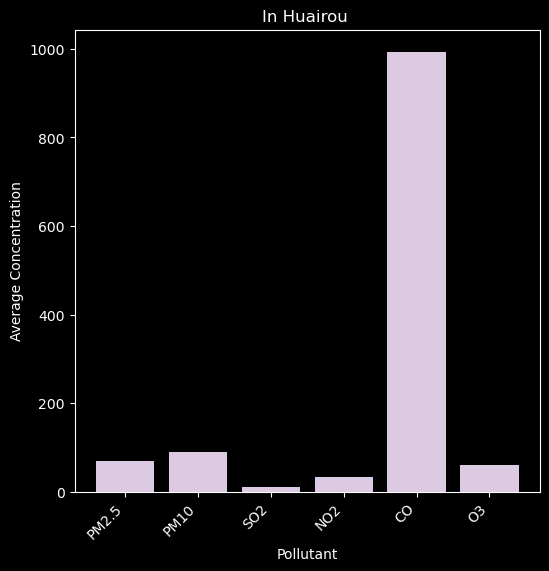

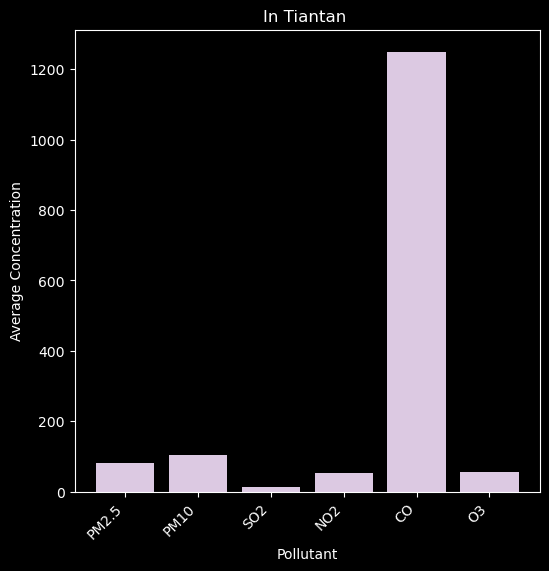

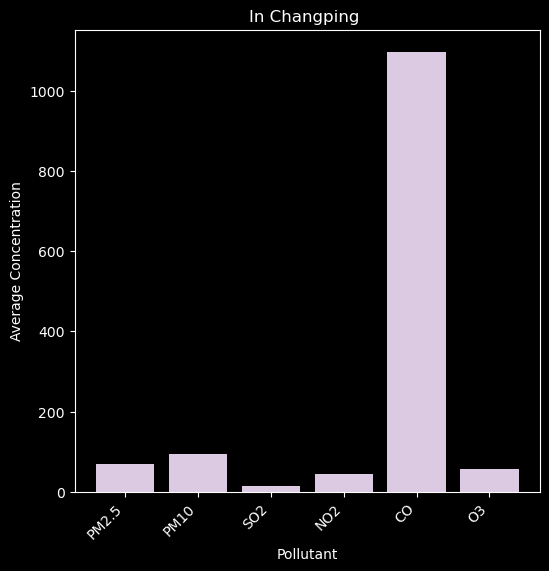

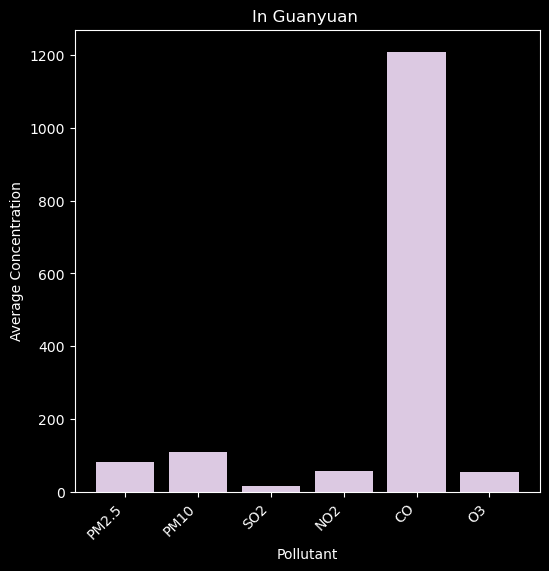

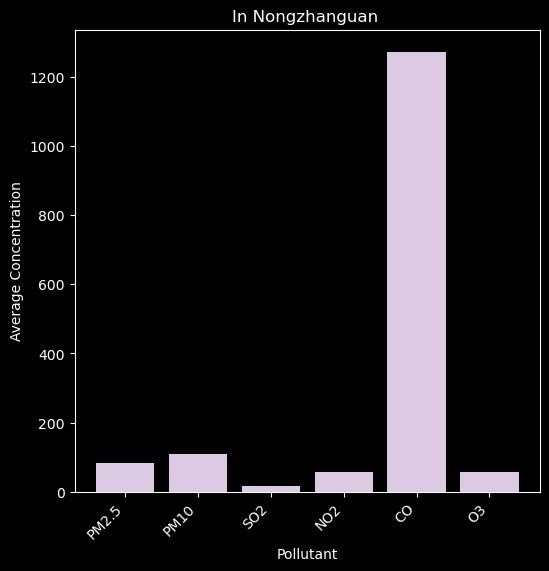

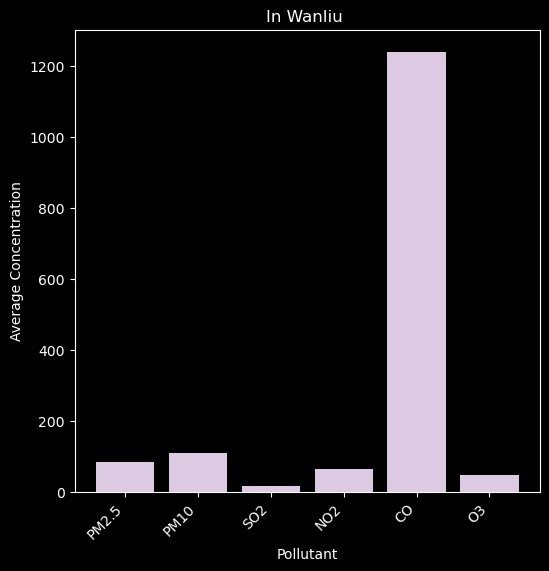

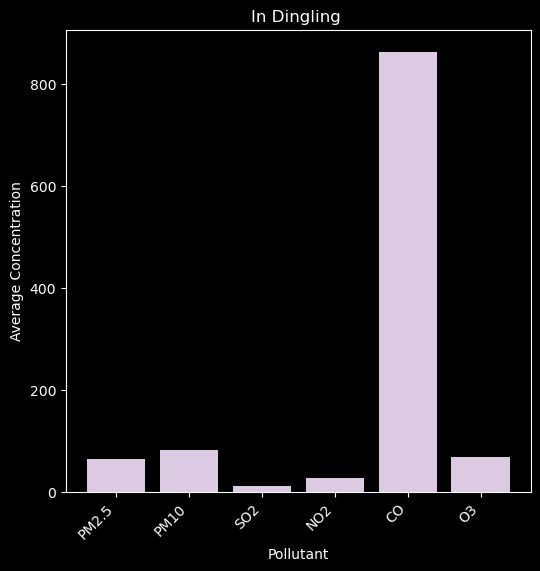

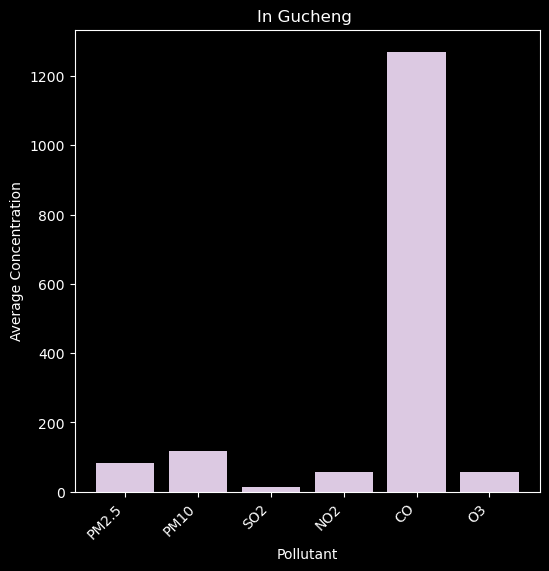

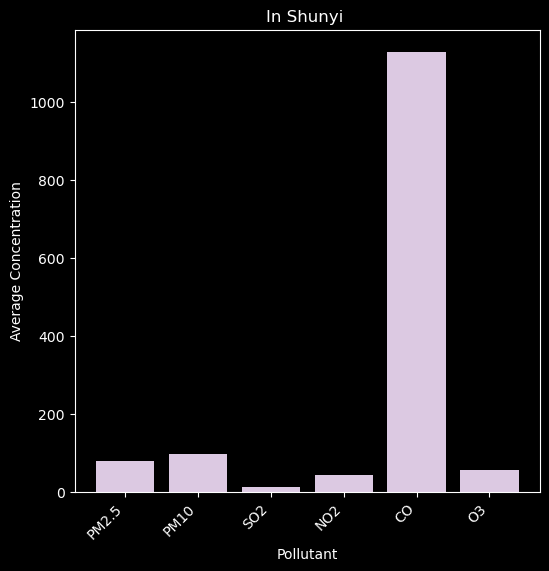

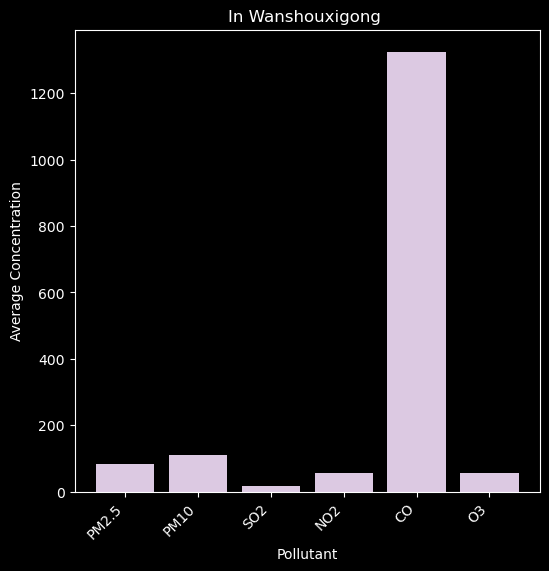

In [61]:


st.markdown("<br/><h3 style='text-align: center;'>Average Pollutant Concentration Comparison for Every City</h4>", unsafe_allow_html=True)





col3, col4,col5 = st.columns(3)
dict_col1 = {
    'aotizhongxin' : dfs_cleaned['aotizhongxin_df_after'],
    'dongsi': dfs_cleaned['dongsi_df_after'],
    'huairou': dfs_cleaned['huairou_df_after'],
    'tiantan': dfs_cleaned['tiantan_df_after']

    }

dict_col2 = {
    'changping': dfs_cleaned['changping_df_after'],
    'guanyuan': dfs_cleaned['guanyuan_df_after'],
    'nongzhanguan': dfs_cleaned['nongzhanguan_df_after'],
    'wanliu': dfs_cleaned['wanliu_df_after']

}

dict_col3 = {
    'dingling': dfs_cleaned['dingling_df_after'],
    'gucheng': dfs_cleaned['gucheng_df_after'],
    'shunyi': dfs_cleaned['shunyi_df_after'],
    'wanshouxigong': dfs_cleaned['wanshouxigong_df_after']
}


with col3:
    for area, df in dict_col1.items():
        df_cleaned = df.agg({
            "PM2.5": "mean",
            "PM10": "mean",
            "SO2":"mean",
            "NO2":"mean",
            "CO":"mean",
            "O3":"mean",
        })

        fig, ax = plt.subplots(figsize=(6,6))
        pollutants = df_cleaned.index
        mean_concentrations = df_cleaned.values
        ax.bar(pollutants, mean_concentrations, color=cmap(0.2))
        ax.set_title("In {} ".format(df['station'][0]))
        ax.set_xlabel("Pollutant")
        ax.set_ylabel("Average Concentration")
        plt.xticks(rotation=45, ha='right')
        st.pyplot(fig)
        plt.show()


with col4:
    for area, df in dict_col2.items():
        df_cleaned = df.agg({
            "PM2.5": "mean",
            "PM10": "mean",
            "SO2":"mean",
            "NO2":"mean",
            "CO":"mean",
            "O3":"mean",
        })

        fig, ax = plt.subplots(figsize=(6,6))
        pollutants = df_cleaned.index
        mean_concentrations = df_cleaned.values
        ax.bar(pollutants, mean_concentrations, color=cmap(0.2))
        ax.set_title("In {} ".format(df['station'][0]))
        ax.set_xlabel("Pollutant")
        ax.set_ylabel("Average Concentration")
        plt.xticks(rotation=45, ha='right')
        st.pyplot(fig)
        plt.show()



with col5:
    for area, df in dict_col3.items():
        df_cleaned = df.agg({
            "PM2.5": "mean",
            "PM10": "mean",
            "SO2":"mean",
            "NO2":"mean",
            "CO":"mean",
            "O3":"mean",
        })

        fig, ax = plt.subplots(figsize=(6,6))
        pollutants = df_cleaned.index
        mean_concentrations = df_cleaned.values
        ax.bar(pollutants, mean_concentrations, color=cmap(0.2))
        ax.set_title("In {} ".format(df['station'][0]))
        ax.set_xlabel("Pollutant")
        ax.set_ylabel("Average Concentration")
        plt.xticks(rotation=45, ha='right')
        st.pyplot(fig)
        plt.show()





In [62]:
st.caption('Copyright (c) 2023')

DeltaGenerator()

# Conclusion



 **Pertanyaan 1: Bagaimana perkembangan kualitas udara per tahunnya? Adakah kenaikan atau penurunan?**<br/>
    <li>Untuk perkembangan konsentrasi polutan CO per tahun terdapat **kenaikan** khususnya pada tahun **2017**, untuk polutan lainnya tidak ada perubahan yang cukup signifikan atau hanya konstan saja</li>
    <li>Perkembangan **kualitas udara(AQI)** per tahun di Beijing **sempat** ada **kenaikan** pada tahun **2016**, ini berhubungan dengan adanya penurunan konsentrasi pada tahun 2016</li>
    <li>**Jika konsentrasi menurun maka nilai AQI naik, perbandingan terbalik**</li>

   <br/>
 **Pertanyaan 2: Jika ada yang mengalami kenaikan, apa saja yang mengalami kenaikan?**<br/>
    <li>Kenaikan konsentrasi pada tahun **2017** adalah **kenaikan** konsentrasi polutan **CO**</li>
    <li>Sedangkan, **kenaikan AQI** ada pada tahun **2016** saat **konsentrasi CO menurun**</li>

   <br/>
   <br/>
 **Pertanyaan 3: Apakah ada polutan yang melebihi batas maksimal hingga tergolong berbahaya?**<br/>
    <li>Ada, yaitu **CO** yang sudah tergolong pada tingkat hazardous</li>
    
   <br/>
   <br/>
 **Pertanyaan 4: Jika ada polutan yang mencapai level berbahaya, dimana sajakah itu?**<br/>
    <li>Polutan CO mencapai tingkat hazardous di **semua distrik**. CO atau karbon monoksida sering ditemukan pada kendaraan bermotor, asap pembakaran dan asap pabrik.</li>

   <br/>
   <br/>

# **Pada tahun terakhir yaitu 2016 kualitas udara(AQI) sempat mengalami kenaikan namun turun lagi pada tahun 2017. Hal ini berbanding terbalik dengan konsentrasi CO.**




## ~THANK YOUUUU~